<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_PSUB1_2024S1_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **SUB1 2024S1 ECM514 LAB - Ciência de Dados**

Esta avaliação avalia o principal dentro do que desenvolvemos ao longo do semestre em termos de seleção, transformação, visualização, análise estatística e testes de hipótese básicos de dados.

**Faça a entrega do seu arquivo .ipynb no Canvas, apenas com código 100% executável e suas respostas.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from IPython.display import IFrame

path = 'https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/'

# **CASO: World Inequality**

Os dados a seguir são extraídos no formato original da base **World Inequality Database** (https://wid.world). Há dados apenas de 4 países e 3 indicadores. Explore e entenda os dados fazendo a seguir os exercícios propostos.


In [ ]:
IFrame('https://wid.world', width=1000, height=300)

In [ ]:
# dados
df = pd.read_csv(path + 'WID_Data_31072024-134039.csv',sep=';',skiprows=1,header=None)
df.columns = ['Country','Indicator','Percentil','Year','Value']
display(df.head())
print(df.shape)

# metadados
meta = pd.read_csv(path + 'WID_Metadata_31072024-134039.csv',sep=';',skiprows=1)
display(meta.head())
print(meta.shape)

,Country,Indicator,Percentil,Year,Value
0,Argentina,agdpro_pall_992_i_AR\nGross domestic product\n...,pall,1950,10930.2471
1,Argentina,agdpro_pall_992_i_AR\nGross domestic product\n...,pall,1951,11117.8236
2,Argentina,agdpro_pall_992_i_AR\nGross domestic product\n...,pall,1952,10334.5144
3,Argentina,agdpro_pall_992_i_AR\nGross domestic product\n...,pall,1953,10674.7948
4,Argentina,agdpro_pall_992_i_AR\nGross domestic product\n...,pall,1954,10903.0427


(888, 5)


,Country Code,Country Name,WID Variable code,Percentile group,Unit,Variable name,Intuitive description,Technical description,Methodological Notes,Sources,Extrapolations,Data points
0,AR,Argentina,agdpro992i,p0p100,ARS; Argentine peso,Gross domestic product. Average Adults. indivi...,Average Gross domestic product within the p0p1...,NaN,We use the GDP level in 2020 from: [URL][URL_L...,See DINA guidelines for methodological explana...,NaN,NaN
1,AR,Argentina,sptinc992j,p90p100,share,Pre-tax national income. Share Adults. equal-s...,Pre-tax national income share held by the p90p...,Pre-tax national income =Pre-tax labor income ...,NaN,"After 2000, [URL][URL_LINK]http://wordpress.wi...","[[1820, 2000], [2019, 2021]]",NaN
2,AR,Argentina,sptinc992t,p90p100,share,Pre-tax national income. Share Adults. tax unit,Pre-tax national income share held by the p90p...,Pre-tax national income =Pre-tax labor income ...,NaN,"After 2000, [URL][URL_LINK]http://wordpress.wi...","[[1820, 2000], [2019, 2021]]",NaN
3,AR,Argentina,lpfghg999i,p90p100,tCO2 equivalent/cap,Personal carbon footprint (all sectors). Avera...,NaN,NaN,Modeled estimates based on the systematic comb...,Distributional estimates: see [URL][URL_LINK]h...,NaN,NaN
4,BR,Brazil,agdpro992i,p0p100,BRL; Brazilian real,Gross domestic product. Average Adults. indivi...,Average Gross domestic product within the p0p1...,NaN,We use the GDP level in 2020 from: [URL][URL_L...,See DINA guidelines for methodological explana...,NaN,NaN


(16, 12)


## Países

In [ ]:
df.Country.unique()

array(['Argentina', 'Brazil', 'China', 'France'], dtype=object)

## Indicadores

- `agdpro_pall_992_i_<COUNTRY_CODE>` = Average GPD (PIB) per capta, em Moeda corrente do país.
- `sptinc_p90p100_z_<COUNTRY_CODE>` = Percentual da Renda do País dos 10% mais Ricos.
- `lpfghg_p90p100_z_<COUNTRY_CODE>` = Média per capta de Emissões de CO$_2$

Note, são apenas 3 indicadores, mas sufixados pelo código do país.

In [ ]:
df.Indicator.str[0:17].unique()

array(['agdpro_pall_992_i', 'sptinc_p90p100_z_', 'lpfghg_p90p100_z_'],
      dtype=object)

In [ ]:
# substring do campo Indicador, o campo traz várias outras informações detalhando o indicador
df.Indicator.str[0:20].unique()

array(['agdpro_pall_992_i_AR', 'sptinc_p90p100_z_AR\n',
       'lpfghg_p90p100_z_AR\n', 'agdpro_pall_992_i_BR',
       'sptinc_p90p100_z_BR\n', 'lpfghg_p90p100_z_BR\n',
       'agdpro_pall_992_i_CN', 'sptinc_p90p100_z_CN\n',
       'lpfghg_p90p100_z_CN\n', 'agdpro_pall_992_i_FR',
       'sptinc_p90p100_z_FR\n', 'lpfghg_p90p100_z_FR\n'], dtype=object)

## Exercício 1. (1,0)

Empregue os dados do dataframe `meta` (de metadados) para, artavés de uma "junção" dos dados, adicionar ao dataframe `df` a coluna `Country Code` como a 1a coluna de `df`.

<br>

**DICA**: verifique após a junção o número de linhas do dataframe obtido!

<br>

**SUA RESPOSTA**:

Faça o display dos valores do no `df` como abaixo.

In [ ]:
# Seu código
df = df.merge(meta[['Country Code', 'Country Name']].drop_duplicates(), left_on='Country', right_on='Country Name', how='inner')
df = df[['Country Code', 'Country', 'Indicator', 'Percentil', 'Year', 'Value']]

In [ ]:
# Sua resposta

display(df.head())
print(df.shape)
print()
print(df.info())

,Country Code,Country,Indicator,Percentil,Year,Value
0,AR,Argentina,agdpro_pall_992_i_AR\nGross domestic product\n...,pall,1950,10930.2471
1,AR,Argentina,agdpro_pall_992_i_AR\nGross domestic product\n...,pall,1951,11117.8236
2,AR,Argentina,agdpro_pall_992_i_AR\nGross domestic product\n...,pall,1952,10334.5144
3,AR,Argentina,agdpro_pall_992_i_AR\nGross domestic product\n...,pall,1953,10674.7948
4,AR,Argentina,agdpro_pall_992_i_AR\nGross domestic product\n...,pall,1954,10903.0427


(888, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  888 non-null    object 
 1   Country       888 non-null    object 
 2   Indicator     888 non-null    object 
 3   Percentil     888 non-null    object 
 4   Year          888 non-null    int64  
 5   Value         669 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 41.8+ KB
None


## Exercício 2. (1,0)

Altere o conteúdo do atributo `Indicator` em todas as linhas de `df`, preservando apenas o essencial do longo texto do indicador, excluindo inclusive o sufixo do código do país.

Assim
- `"agdpro_pall_992_i_...pall_99"` $\longrightarrow$ `"agdpro_pall_992"`
- `"sptinc_p90p100_z_ ... p90p10"` $\longrightarrow$ `"sptinc_p90p100"`
- `"lpfghg_p90p100_z_ ... p90p10"` $\longrightarrow$ `"lpfghg_p90p100"`


<br>

**DICA**: sugestão, empregue `apply()`

<br>

**SUA RESPOSTA**:

Faça o display dos valores do no `df` como abaixo.

In [ ]:
# Seu código
df.Indicator = df.Indicator.apply(lambda x: x.split('\n')[0][0:-5])

In [ ]:
# Sua resposta
display(df.head())
print(df.shape)
print()
display(df.Indicator.value_counts())

,Country Code,Country,Indicator,Percentil,Year,Value
0,AR,Argentina,agdpro_pall_992,pall,1950,10930.2471
1,AR,Argentina,agdpro_pall_992,pall,1951,11117.8236
2,AR,Argentina,agdpro_pall_992,pall,1952,10334.5144
3,AR,Argentina,agdpro_pall_992,pall,1953,10674.7948
4,AR,Argentina,agdpro_pall_992,pall,1954,10903.0427


(888, 6)



,count
Indicator,
agdpro_pall_992,296
sptinc_p90p100,296
lpfghg_p90p100,296


## Exercício 3. (2,0)

Produza um gráfico para **analisar a tendência da concentração de renda nos países com foco na análise de concentração de renda na China**. Ao contrário de outros países desenvolvidos (OCDE, por exemplo), a concentração de renda nos 10% mais ricos, subiu nas últimas décadas como reflexo da adoção das políticas de mercado e capitalismo de estado adotadas. **Empregue `figsize=(10,4)`, e procure criar um gráfico o mais próximo possível do apresentado abaixo**.

<br>

**DICA**: Algumas sugestões de comandos úteis. Empregue `np.polyfit()` para criar a curva de tendência dos dados da China, e combine comandos do `seaborn` (`hue`) e `matplotlib`.

<br>

**SUA RESPOSTA**:

Faça o display da figura que produzir.

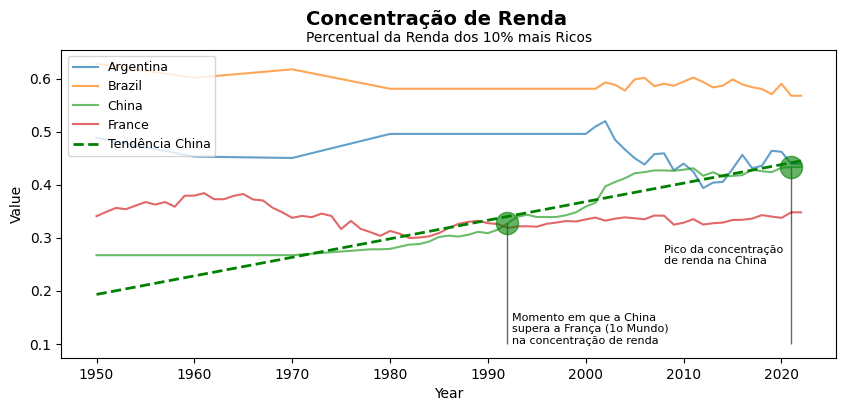

In [ ]:
# seu código
plt.figure(figsize=(10,4))

sns.lineplot(x='Year', y='Value', hue='Country', data=df[df.Indicator == "sptinc_p90p100"],alpha=0.7)

mask = (df.Country == 'China') & (df.Indicator == "sptinc_p90p100")
x = df[mask].dropna().Year.values
y = df[mask].dropna().Value.values
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, label='Tendência China',lw=2,color='g',linestyle='--')

mask = (df.Country == 'China') & (df.Indicator == "sptinc_p90p100")
plt.vlines(df[mask].nlargest(1,'Value').Year.values,0.1,df[mask].nlargest(1,'Value').Value.values,color='k',lw=1,alpha=0.6)
plt.plot(df[mask].nlargest(1,'Value').Year.values,df[mask].nlargest(1,'Value').Value.values,color='g',marker='o', markersize=16 ,alpha=0.6)
plt.text(df[mask].nlargest(1,'Value').Year.values-13,0.25,"Pico da concentração\nde renda na China",fontsize=8)

mask = (df.Country == 'France') & (df.Indicator == "sptinc_p90p100")
meanFR = df[mask].dropna().Value.mean()
mask = (df.Country == 'China') & (df.Indicator == "sptinc_p90p100") & (df.Value <= meanFR)
plt.vlines(df[mask].nlargest(1,'Value').Year.values,0.1,df[mask].nlargest(1,'Value').Value.values,color='k',lw=1,alpha=0.6)
plt.plot(df[mask].nlargest(1,'Value').Year.values,df[mask].nlargest(1,'Value').Value.values,color='g',marker='o', markersize=16 ,alpha=0.6)
plt.text(df[mask].nlargest(1,'Value').Year.values+0.5,0.1,"Momento em que a China\nsupera a França (1o Mundo)\nna concentração de renda",fontsize=8)

plt.legend(loc='upper left',fontsize=9)
plt.suptitle('Concentração de Renda',fontsize=14,weight='bold')
plt.title('\nPercentual da Renda dos 10% mais Ricos',fontsize=10)
plt.show()

## Exercício 4. (1,5)

Neste exercício você vai analisar a **correlação** dos indicadores de produto interno bruto, concentração de renda e concentração emissões nos diferentes países.

### Ex 4a.  

Produza um gráfico para **analisar a correlação dos indicadores de produto interno bruto, concentração de renda e concentração emissões nos diferentes países**. Note que os indicadores encontram-se em escalas diferentes e, portanto, precisam ser normalizados. **Empregue `figsize=(12,7)`, e procure criar um gráfico o mais próximo possível do apresentado abaixo**.

<br>

**DICA**: Note o compartilhamento da escala do eixo y entre os gráficos.

<br>

**SUA RESPOSTA**:

Faça o display da figura que produzir.

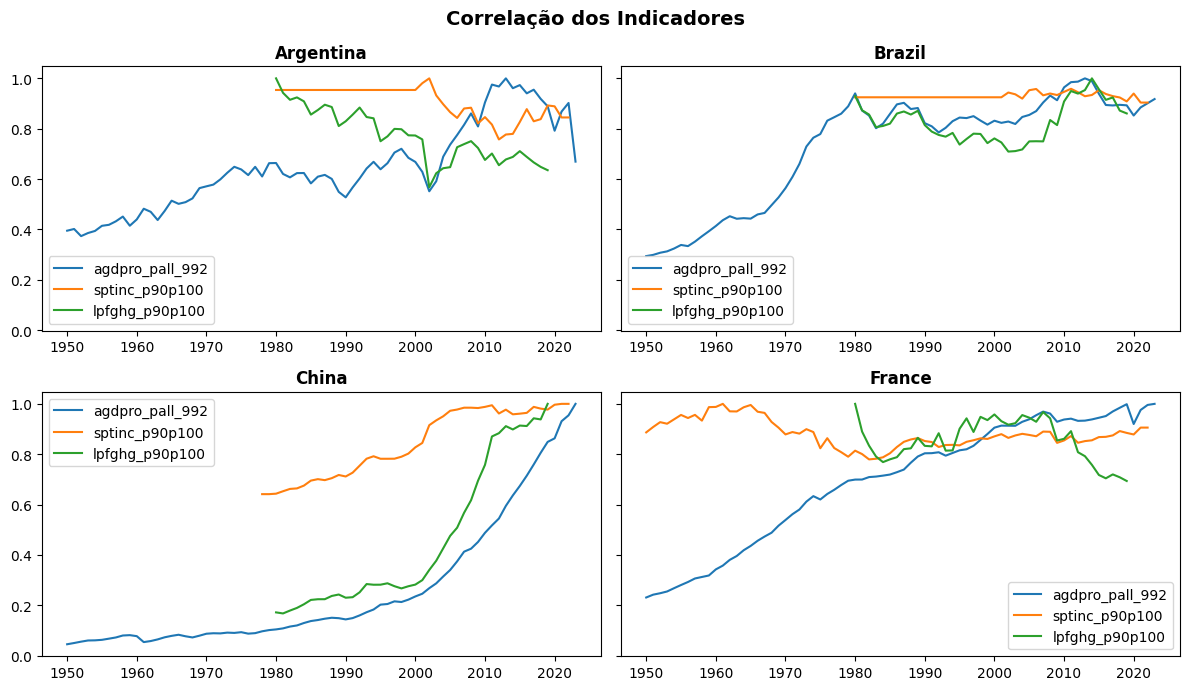

In [ ]:
# Seu código
fig, ax = plt.subplots(2,2,figsize=(12,7),sharey=True)
ax = ax.flatten()

for i, country in enumerate(df.Country.unique()):
  for ind in df[df.Country == country].Indicator.unique():
    mask = (df.Country == country) & (df.Indicator == ind)
    ax[i].plot(df[mask].Year, df[mask].Value / df[mask].Value.max(), label=ind)
    ax[i].set_title(country, weight='bold')
    ax[i].legend()

plt.suptitle('Correlação dos Indicadores',fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

### Ex 4b.

Observe os gráficos do exercício anterior. Obtenha agora a **correlação** (coeficiente de Pearson) do  produto interno bruto per capta com relação aos sdemais indicadores **somente para o país em que fica mais evidente uma correlação positiva entre os indicadores**.

<br>

**DICA**: Sugestão `numpy.corrcoef()`, `df.corr()`.

<br>

**SUA RESPOSTA**:

Faça o display dos valores obtidos.

In [ ]:
for country in df.Country.unique():
  print(country)

  ind = df[(df.Country == country)].Indicator.unique()

  df_gpd = df[(df.Country == country) & (df.Indicator == ind[0])].copy().reset_index(drop=True)
  df_gpd.drop(columns=['Indicator','Percentil'],inplace=True)
  df_gpd.rename(columns={'Value':ind[0]},inplace=True)
  # display(df_gpd_BR.head())

  df_ppd = df[(df.Country == country) & (df.Indicator == ind[1])].copy().reset_index(drop=True)
  df_ppd.drop(columns=['Indicator','Percentil'],inplace=True)
  df_ppd.rename(columns={'Value':ind[1]},inplace=True)
  # display(df_ppd_BR.head())

  df_fpd = df[(df.Country == country) & (df.Indicator == ind[2])].copy().reset_index(drop=True)
  df_fpd.drop(columns=['Indicator','Percentil'],inplace=True)
  df_fpd.rename(columns={'Value':ind[2]},inplace=True)
  # display(df_fpd_BR.head())

  display( df_gpd.merge(df_ppd,on=['Country Code', 'Country', 'Year']).dropna().drop(columns=['Country Code', 'Country', 'Year']).corr() )
  display( df_gpd.merge(df_fpd,on=['Country Code', 'Country', 'Year']).dropna().drop(columns=['Country Code', 'Country', 'Year']).corr() )


Argentina


,agdpro_pall_992,sptinc_p90p100
agdpro_pall_992,1.000000,-0.794856
sptinc_p90p100,-0.794856,1.000000


,agdpro_pall_992,lpfghg_p90p100
agdpro_pall_992,1.000000,-0.577409
lpfghg_p90p100,-0.577409,1.000000


Brazil


,agdpro_pall_992,sptinc_p90p100
agdpro_pall_992,1.000000,-0.551217
sptinc_p90p100,-0.551217,1.000000


,agdpro_pall_992,lpfghg_p90p100
agdpro_pall_992,1.00000,0.80837
lpfghg_p90p100,0.80837,1.00000


China


,agdpro_pall_992,sptinc_p90p100
agdpro_pall_992,1.000000,0.846657
sptinc_p90p100,0.846657,1.000000


,agdpro_pall_992,lpfghg_p90p100
agdpro_pall_992,1.0000,0.9783
lpfghg_p90p100,0.9783,1.0000


France


,agdpro_pall_992,sptinc_p90p100
agdpro_pall_992,1.000000,-0.583241
sptinc_p90p100,-0.583241,1.000000


,agdpro_pall_992,lpfghg_p90p100
agdpro_pall_992,1.000000,-0.039797
lpfghg_p90p100,-0.039797,1.000000


## Exercício 5. (1,5)

Observando o **gráfico de concentração da renda nos 10% mais ricos** (ver exercício 3) **a partir de 2000** (inclusive) , a **Argentina** argumenta ter em média uma concentração de renda igual a da  **China** no mesmo período.

### Ex 5a.
Qual teste estatístico você deve aplicar para aceitar ou rejeitar essa hipótese da Argentina? **Justifique sua resposta**.

<br>

**Dica**: Antes de dar sua resposta, verifique através de um teste estatístico se os dados cumprem com os requerimentos de um teste paramétrico ou se será necessário um teste não paramétrico.

<br>


**SUA RESPOSTA AQUI**:

<br>



**RESPOSTA:**

Dados não normalizados $\longrightarrow$ teste não paramétrico $+$ amostras de mesmo tamanho $\longrightarrow$ **Wilcoxon**

In [ ]:
# Seu código

mask = (df.Year >= 2000) & (df.Country == 'China') & (df.Indicator == 'sptinc_p90p100')
grupo1 = df[ mask ].dropna().Value.values
mask = (df.Year >= 2000) & (df.Country == 'Argentina') & (df.Indicator == 'sptinc_p90p100')
grupo2 = df[ mask ].dropna().Value.values

stat, p_valor = stats.shapiro(grupo1)

print("Estatística Shapiro-Wilk:", stat)
print("Valor p:", p_valor)
print()

if p_valor < 0.05:
    print("Dados não têm distribuição normal")
else:
    print("Dados têm distribuição normal")

print()

Estatística Shapiro-Wilk: 0.7227723959383884
Valor p: 2.804841428620415e-05

Dados não têm distribuição normal



In [ ]:
len(grupo1), len(grupo2)

(23, 23)

### Ex 5b.
Seu teste confirma a hipótese da Argentina ao nível de significância de 0.05? Qual o p-value obtido no seu teste?

<br>


**SUA RESPOSTA AQUI**:

<br>

In [ ]:
# Seu código
resultado = stats.wilcoxon(grupo1, grupo2)

alpha = 0.05
if resultado.pvalue < alpha:
    print(f"p-value = {resultado.pvalue:.4f}. Rejeitamos a hipótese nula. As médias dos grupos são diferentes.")
else:
    print(f"p-value = {resultado.pvalue:.4f}. Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que as médias são diferentes.")


p-value = 0.0008. Rejeitamos a hipótese nula. As médias dos grupos são diferentes.


## Exercício 6. (1,0)

A **China** argumenta que mantêm **,a partir de 2010 (inclusive), a concentração da renda nos 10% mais ricos** abaixo de 43% (0.43).

### Ex 6a.
Qual teste estatístico você deve aplicar para aceitar ou rejeitar essa hipótese da China? **Justifique sua resposta**.

<br>

**Dica**: Antes de dar sua resposta, verifique através de um teste estatístico se os dados cumprem com os requerimentos de um teste paramétrico, se será necessário um teste não paramétrico ou **podendo ainda indicar não haver um teste adequado para esses dados**.

<br>


**SUA RESPOSTA AQUI**:

<br>



**RESPOSTA:**

Dados normalizados $\longrightarrow$ teste paramétrico $+$ uma única amostra $+$ hipótese de "*menor*" $\longrightarrow$ **ttest_1samp** unilateral

In [ ]:
# Seu código
mask = (df.Year >= 2010) & (df.Country == 'China') & (df.Indicator == 'sptinc_p90p100')
grupo1 = df[ mask ].dropna().Value.values

stat, p_valor = stats.shapiro(grupo1)

print("Estatística Shapiro-Wilk:", stat)
print("Valor p:", p_valor)
print("Média:", grupo1.mean())
print()

if p_valor < 0.05:
    print("Dados não têm distribuição normal")
else:
    print("Dados têm distribuição normal")

print()

Estatística Shapiro-Wilk: 0.9033279532939621
Valor p: 0.14855866019916208
Média: 0.4250846153846155

Dados têm distribuição normal



### Ex 6b.
Seu teste confirma a hipótese da China ao nível de significância de 0.05? Qual o p-value obtido no seu teste?

<br>


**SUA RESPOSTA AQUI**:

<br>

In [ ]:
# Seu código
resultado = stats.ttest_1samp(grupo1,0.43,alternative="less")

alpha = 0.05
if resultado.pvalue < alpha:
    print(f"p-value = {resultado.pvalue:.4f}. Rejeitamos a hipótese nula. A média é menor que o valor dado.")
else:
    print(f"p-value = {resultado.pvalue:.4f}. Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que a média é menor que o valor dado.")

p-value = 0.0104. Rejeitamos a hipótese nula. A média é menor que o valor dado.


## Exercício 7. (1,0)

**O Brasil afirma que vem reduzindo a concentração de renda nos 10% mais ricos nos últimos anos.** Ele apresenta como base para essa afirmação os concentração de renda no período

`mean(sptinc_p90p100`$[2000, 2010[) = 0.5884$ $\ge$ `mean(sptinc_p90p100`$[2019, 2022[) = 0.5868$




### Ex 7a.
Qual teste estatístico você deve aplicar para aceitar ou rejeitar essa hipótese do Brasil? **Justifique sua resposta**.

<br>

**Dica**: Você pode assumir a normalidade dos dados para empregar um teste paramétrico (de fato um teste de normalidade vai demonstrar que a distribuição é suficientemente próxima da normal). **Entretanto, note que  as amostras têm tamanhos diferentes**.

<br>


**SUA RESPOSTA AQUI**:

<br>



**RESPOSTA:**

Dados normalizados $\longrightarrow$ teste paramétrico $+$  amostras de tamanhos diferentes $+$ hipótese de "*menor*"  $\longrightarrow$ **t de Welch**, `ttest_ind(a,b,equal_var=False, alternative='less')` unilateral

### Ex 7b.
Seu teste confirma a hipótese do Brasil ao nível de significância de 0.05? Qual o p-value obtido no seu teste?

<br>


**SUA RESPOSTA AQUI**:

<br>

In [ ]:
mask = (df.Year >= 2000) & (df.Year < 2010) & (df.Country == 'Brazil') & (df.Indicator == 'sptinc_p90p100')
grupo1 = df[ mask ].dropna().Value.values
mask = (df.Year >= 2010) & (df.Year < 2022) & (df.Country == 'Brazil') & (df.Indicator == 'sptinc_p90p100')
grupo2 = df[ mask ].dropna().Value.values

print(f'Médias das amostras: {grupo1.mean():.4f}, {grupo2.mean():.4f}')
print(f'Tamanho das amostras: {len(grupo1)}, {len(grupo2)}')

resultado = stats.ttest_ind(grupo2, grupo1, equal_var=False, alternative='less')

alpha = 0.05
if resultado.pvalue < alpha:
    print(f"p-value = {resultado.pvalue:.4f}. Rejeitamos a hipótese nula. Os dados do grupo2 são estatisticamente menores que os dados do grupo1.")
else:
    print(f"p-value = {resultado.pvalue:.4f}. Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que os dados do grupo2 são estatisticamente menores que os dados do grupo1.")


Médias das amostras: 0.5884, 0.5868
Tamanho das amostras: 10, 12
p-value = 0.3397. Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que os dados do grupo2 são estatisticamente menores que os dados do grupo1.


# **CASE**: **Jogos Olímpicos**

Considere a seguinte base de medalhas dos Jogos Olímpicos até a edição de 2016. Explore e entenda os dados fazendo a seguir os exercícios propostos.

## Load e preparação dos dados

In [ ]:
import os
os.environ["PATH_DATA"] = path + 'olympic_games.zip'

!wget $PATH_DATA
!unzip olympic_games.zip

--2024-08-01 12:40:51--  https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/olympic_games.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Rogerio-mack/IMT_CD_2024/main/data/olympic_games.zip [following]
--2024-08-01 12:40:51--  https://raw.githubusercontent.com/Rogerio-mack/IMT_CD_2024/main/data/olympic_games.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5690772 (5.4M) [application/zip]
Saving to: ‘olympic_games.zip.1’

olympic_games.zip.1 100%[===================>]   5.43M  --.-KB/s    in 0.09s   

2024-08-01 12:40:51 (59.3 MB/s) - ‘olympic_games.zip.1’ saved [5690772/5690772]


In [ ]:
df = pd.read_csv('athlete_events.csv',sep=',')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Estamos interessados somente nas medalhas de ouro ganhas pelos países ao longo das competições. Assim faremos as seguintes transformações chegando no **dataframe final que você deve empregar**.

In [ ]:
df = df[['Team','Year','Medal']].sort_values(by=['Year','Team']).reset_index(drop=True)
df = df.groupby(['Team','Year','Medal'])[['Medal']].count()
df.rename(columns={'Medal':'Count'},inplace=True)
df.reset_index(inplace=True)
df = df[ df.Medal == 'Gold' ].sort_values(by=['Team','Year']).reset_index(drop=True)
df.head()

,Team,Year,Medal,Count
0,Algeria,1992,Gold,1
1,Algeria,1996,Gold,2
2,Algeria,2000,Gold,1
3,Algeria,2012,Gold,1
4,Amateur Athletic Association,1900,Gold,5


## Exercício 8.  (1,5)

A **Alemanha**, com base na média de medalhas de ouro ganhas em todas as competições **a partir de 2000** (inclusive), afirma ter um desempenho maior que o da **China** no mesmo período.

In [ ]:
medals_china = df[ (df.Year > 2000) & (df.Team == 'China') ]
medals_germany = df[ (df.Year > 2000) & (df.Team == 'Germany') ]

print('Gold medals means\n')
print(f"China '{medals_china.Count.mean():.2f}', Germany '{medals_germany.Count.mean():.2f}'")


Gold medals means

China '27.75', Germany '28.62'


### Ex 8a.
Qual teste estatístico você deve aplicar para aceitar ou rejeitar essa hipótese?

**SUA RESPOSTA AQUI**:

<br>



**RESPOSTA:**

Dados discretos, não contínuos $\longrightarrow$ teste não paramétrico $+$  amostras de tamanhos iguais $+$ hipótese de "*maior*"  $\longrightarrow$ **wilcoxon** unilateral

### Ex 8b.
Seu teste confirma a hipótese da Alemanha ao nível de significância de 0.05? Qual o p-value obtido no seu teste?

**SUA RESPOSTA AQUI**:

<br>

In [ ]:
grupo1 = medals_china.Count.values
grupo2 = medals_germany.Count.values

resultado = stats.wilcoxon(grupo2, grupo1, alternative='greater')

alpha = 0.05
if resultado.pvalue < alpha:
    print(f"p-value = {resultado.pvalue:.4f}. Rejeitamos a hipótese nula. Os dados do grupo2 são estatisticamente maiores que os dados do grupo1.")
else:
    print(f"p-value = {resultado.pvalue:.4f}. Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que os dados do grupo2 são estatisticamente maiores que os dados do grupo1.")


p-value = 0.2734. Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que os dados do grupo2 são estatisticamente maiores que os dados do grupo1.


In [ ]:
grupo1 = medals_china.Count.values
grupo2 = medals_germany.Count.values

resultado = stats.wilcoxon(grupo1, grupo2, alternative='less')

alpha = 0.05
if resultado.pvalue < alpha:
    print(f"p-value = {resultado.pvalue:.4f}. Rejeitamos a hipótese nula. Os dados do grupo1 são estatisticamente menores que os dados do grupo2.")
else:
    print(f"p-value = {resultado.pvalue:.4f}. Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que os dados do grupo1 são estatisticamente menores que os dados do grupo2.")


p-value = 0.2734. Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que os dados do grupo1 são estatisticamente menores que os dados do grupo2.


## Exercício 9. (1,5)

Já a **China**, muito mais jovem do que a Alemanha no Jogos Olímpicos (a partir de 1984), acredita que, com base na média de medalhas de ouro ganhas **a partir de 2000** (inclusive), ter um desempenho melhor que o da **Alemanha** considerando todas as edições dos Jogos que esta participou (desde 1896).

In [ ]:
medals_china = df[ (df.Year > 2000) & (df.Team == 'China') ]
medals_germany = df[ (df.Team == 'Germany') ]

print('Gold medals means\n')
print(f"China '{medals_china.Count.mean():.2f}', Germany '{medals_germany.Count.mean():.2f}'")


Gold medals means

China '27.75', Germany '26.12'


### Ex 9a.
Qual teste estatístico você deve aplicar para aceitar ou rejeitar essa hipótese?

**SUA RESPOSTA AQUI**:

<br>



**RESPOSTA:**

Dados discretos, não contínuos $\longrightarrow$ teste não paramétrico $+$  amostras de tamanhos diferentes $+$ hipótese de "*maior*"  $\longrightarrow$ **mannwhitneyu** unilateral

### Ex 9b.
Seu teste confirma a hipótese da China ao nível de significância de 0.05? Qual o p-value obtido no seu teste?

**SUA RESPOSTA AQUI**:

<br>

In [ ]:
grupo1 = medals_china.Count.values
grupo2 = medals_germany.Count.values

resultado = stats.mannwhitneyu(grupo1, grupo2, alternative='greater')

alpha = 0.05
if resultado.pvalue < alpha:
    print(f"p-value = {resultado.pvalue:.4f}. Rejeitamos a hipótese nula. Os dados do grupo1 são estatisticamente maiores que os dados do grupo2.")
else:
    print(f"p-value = {resultado.pvalue:.4f}. Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que os dados do grupo1 são estatisticamente maiores que os dados do grupo2.")


p-value = 0.5646. Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que os dados do grupo1 são estatisticamente maiores que os dados do grupo2.
